In [1]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
import os
import gzip

df = pd.read_csv(os.path.join("../Data", "train.csv"))
columns = df.columns

# Define the columns you want to use as headers
columns_to_use = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
    'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
    'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
    'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
    'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
    'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
    'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
    'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
    'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
    'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
    'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
    'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
    'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
    'Cover_Type'
]

# Path to your gzip file
file_path = '../data/FULL-TEST.gz'

# Use pandas to read the gzip file directly, specifying the column names
full_test_df = pd.read_csv(gzip.open(file_path, 'rt'), names=columns_to_use, header=None)

In [120]:
import numpy as np

class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rs_df = X.copy()
        rs_df['Dist_to_Hydrolody'] = (rs_df['Horizontal_Distance_To_Hydrology']**2 + rs_df['Vertical_Distance_To_Hydrology']**2 ) **0.5
        rs_df['Elev_m_VDH'] = rs_df['Elevation'] - rs_df['Vertical_Distance_To_Hydrology']
        rs_df['Elev_p_VDH'] = rs_df['Elevation'] + rs_df['Vertical_Distance_To_Hydrology']
        rs_df['Elev_m_HDH'] = rs_df['Elevation'] - rs_df['Horizontal_Distance_To_Hydrology']
        rs_df['Elev_p_HDH'] = rs_df['Elevation'] + rs_df['Horizontal_Distance_To_Hydrology']
        rs_df['Elev_m_DH'] = rs_df['Elevation'] - rs_df['Dist_to_Hydrolody']
        rs_df['Elev_p_DH'] = rs_df['Elevation'] + rs_df['Dist_to_Hydrolody']
        rs_df['Hydro_p_Fire'] = rs_df['Horizontal_Distance_To_Hydrology'] + rs_df['Horizontal_Distance_To_Fire_Points']
        rs_df['Hydro_m_Fire'] = rs_df['Horizontal_Distance_To_Hydrology'] - rs_df['Horizontal_Distance_To_Fire_Points']
        rs_df['Hydro_p_Road'] = rs_df['Horizontal_Distance_To_Hydrology'] + rs_df['Horizontal_Distance_To_Roadways']
        rs_df['Hydro_m_Road'] = rs_df['Horizontal_Distance_To_Hydrology'] - rs_df['Horizontal_Distance_To_Roadways']
        rs_df['Fire_p_Road'] = rs_df['Horizontal_Distance_To_Fire_Points'] + rs_df['Horizontal_Distance_To_Roadways']
        rs_df['Fire_m_Road'] = rs_df['Horizontal_Distance_To_Fire_Points'] - rs_df['Horizontal_Distance_To_Roadways']
         
        rs_df['Soil'] = 0
        for i in range(1, 41):
            rs_df['Soil'] += i * rs_df['Soil_Type'+str(i)]
        
        rs_df['Wilderness_Area'] = 0
        for i in range(1, 5):
            rs_df['Wilderness_Area'] += i * rs_df['Wilderness_Area'+str(i)]

        # new_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
        #                 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
        #                 'Horizontal_Distance_To_Fire_Points', 'Elev_m_VDH', 'Dist_to_Hydrolody', 'Hydro_p_Fire',
        #                 'Hydro_m_Fire', 'Hydro_p_Road', 'Hydro_m_Road', 'Fire_p_Road', 'Fire_m_Road', 'Wilderness_Area', 'Soil'] 
        
        new_features = ['Elevation', 
                        'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                        'Horizontal_Distance_To_Fire_Points', 'Elev_m_VDH', 'Dist_to_Hydrolody', 'Hydro_p_Fire',
                        'Hydro_m_Fire', 'Hydro_p_Road', 'Hydro_m_Road', 'Fire_p_Road', 'Fire_m_Road', 'Wilderness_Area', 'Soil']
        
        return rs_df[new_features]


In [107]:
# from sklearn.base import BaseEstimator, TransformerMixin
# import pandas as pd
# import numpy as np
# ##################################################################### AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa
# from sklearn.base import BaseEstimator, TransformerMixin
# import numpy as np
# import pandas as pd

# class FeatureEngineering(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         # Initialize a dictionary to store the mean elevation of each wilderness area
#         self.wilderness_area_mean_elevations = {}

#     def fit(self, X, y=None):
#         # Assuming wilderness area columns are named 'Wilderness_Area1' through 'Wilderness_Area4'
#         for i in range(1, 5):
#             wilderness_area_col = f'Wilderness_Area{i}'
#             # Calculate mean elevation for each wilderness area and store it
#             self.wilderness_area_mean_elevations[i] = X[X[wilderness_area_col] == 1]['Elevation'].mean()
#         return self
    
#     def transform(self, X):
#         rs_df = X.copy()
#         # Original transformations
#         rs_df['Dist_to_Hydrolody'] = (rs_df['Horizontal_Distance_To_Hydrology']**2 + rs_df['Vertical_Distance_To_Hydrology']**2 ) ** 0.5
#         rs_df['Elev_m_VDH'] = rs_df['Elevation'] - rs_df['Vertical_Distance_To_Hydrology']
#         rs_df['Elev_p_VDH'] = rs_df['Elevation'] + rs_df['Vertical_Distance_To_Hydrology']
#         rs_df['Elev_m_HDH'] = rs_df['Elevation'] - rs_df['Horizontal_Distance_To_Hydrology']
#         rs_df['Elev_p_HDH'] = rs_df['Elevation'] + rs_df['Horizontal_Distance_To_Hydrology']
#         rs_df['Elev_m_DH'] = rs_df['Elevation'] - rs_df['Dist_to_Hydrolody']
#         rs_df['Elev_p_DH'] = rs_df['Elevation'] + rs_df['Dist_to_Hydrolody']
#         rs_df['Hydro_p_Fire'] = rs_df['Horizontal_Distance_To_Hydrology'] + rs_df['Horizontal_Distance_To_Fire_Points']
#         rs_df['Hydro_m_Fire'] = rs_df['Horizontal_Distance_To_Hydrology'] - rs_df['Horizontal_Distance_To_Fire_Points']
#         rs_df['Hydro_p_Road'] = rs_df['Horizontal_Distance_To_Hydrology'] + rs_df['Horizontal_Distance_To_Roadways']
#         rs_df['Hydro_m_Road'] = rs_df['Horizontal_Distance_To_Hydrology'] - rs_df['Horizontal_Distance_To_Roadways']
#         rs_df['Fire_p_Road'] = rs_df['Horizontal_Distance_To_Fire_Points'] + rs_df['Horizontal_Distance_To_Roadways']
#         rs_df['Fire_m_Road'] = rs_df['Horizontal_Distance_To_Fire_Points'] - rs_df['Horizontal_Distance_To_Roadways']
        
#         rs_df['Soil'] = 0
#         for i in range(1, 41):
#             rs_df['Soil'] += i * rs_df['Soil_Type'+str(i)]
        
#         rs_df['Wilderness_Area'] = 0
#         for i in range(1, 5):
#             rs_df['Wilderness_Area'] += i * rs_df[f'Wilderness_Area{i}']

#         # Calculate the relative elevation for each observation
#         rs_df['Relative_Elevation'] = np.zeros(shape=rs_df.shape[0])
#         for i in range(1, 5):
#             mean_elevation = self.wilderness_area_mean_elevations[i]
#             mask = rs_df[f'Wilderness_Area{i}'] == 1
#             # Use .loc to safely assign values based on the mask
#             rs_df.loc[mask, 'Relative_Elevation'] = rs_df.loc[mask, 'Elevation'] - mean_elevation
#             # Multiply the Relative_Elevation by the wilderness area binary indicator
#             rs_df[f'Relative_Elevation_WA{i}'] = rs_df['Relative_Elevation'] * rs_df[f'Wilderness_Area{i}']

#         # # Define the features to be included in the transformed DataFrame
#         # new_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
#         #                 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
#         #                  'Dist_to_Hydrolody', 'Hydro_p_Fire',
#         #                 'Hydro_m_Fire', 'Hydro_p_Road', 'Hydro_m_Road', 'Fire_p_Road', 'Fire_m_Road', 'Soil',
#         #                 'Wilderness_Area', 'Relative_Elevation', 'Horizontal_Distance_To_Fire_Points']  #,, 'Elev_m_VDH'
#         # #'Relative_Elevation_WA1','Relative_Elevation_WA2','Relative_Elevation_WA3','Relative_Elevation_WA4'
        
#         new_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
#                        'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
#                        'Horizontal_Distance_To_Fire_Points','Dist_to_Hydrolody', 'Hydro_p_Fire',
#                        'Hydro_m_Fire', 'Hydro_p_Road', 'Hydro_m_Road', 'Fire_p_Road', 'Fire_m_Road', 'Soil',
#                        'Wilderness_Area', 'Relative_Elevation','Elev_m_VDH']


#         # Return the DataFrame with the new features
#         return rs_df[new_features] # [f'Wilderness_Area{i}' for i in range(1, 5)]


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rs_df = X.copy()
        
        # Original transformations
        rs_df['Dist_to_Hydrolody'] = (rs_df['Horizontal_Distance_To_Hydrology']**2 + rs_df['Vertical_Distance_To_Hydrology']**2 ) ** 0.5
        rs_df['Elev_m_VDH'] = rs_df['Elevation'] - rs_df['Vertical_Distance_To_Hydrology']
        rs_df['Elev_p_VDH'] = rs_df['Elevation'] + rs_df['Vertical_Distance_To_Hydrology']
        rs_df['Elev_m_HDH'] = rs_df['Elevation'] - rs_df['Horizontal_Distance_To_Hydrology']
        rs_df['Elev_p_HDH'] = rs_df['Elevation'] + rs_df['Horizontal_Distance_To_Hydrology']
        rs_df['Elev_m_DH'] = rs_df['Elevation'] - rs_df['Dist_to_Hydrolody']
        rs_df['Elev_p_DH'] = rs_df['Elevation'] + rs_df['Dist_to_Hydrolody']
        rs_df['Hydro_p_Fire'] = rs_df['Horizontal_Distance_To_Hydrology'] + rs_df['Horizontal_Distance_To_Fire_Points']
        rs_df['Hydro_m_Fire'] = rs_df['Horizontal_Distance_To_Hydrology'] - rs_df['Horizontal_Distance_To_Fire_Points']
        rs_df['Hydro_p_Road'] = rs_df['Horizontal_Distance_To_Hydrology'] + rs_df['Horizontal_Distance_To_Roadways']
        rs_df['Hydro_m_Road'] = rs_df['Horizontal_Distance_To_Hydrology'] - rs_df['Horizontal_Distance_To_Roadways']
        rs_df['Fire_p_Road'] = rs_df['Horizontal_Distance_To_Fire_Points'] + rs_df['Horizontal_Distance_To_Roadways']
        rs_df['Fire_m_Road'] = rs_df['Horizontal_Distance_To_Fire_Points'] - rs_df['Horizontal_Distance_To_Roadways']
         
        # Soil and Wilderness Area processing
        rs_df['Soil'] = 0
        for i in range(1, 41):
            rs_df['Soil'] += i * rs_df['Soil_Type'+str(i)]
        
        rs_df['Wilderness_Area'] = 0
        for i in range(1, 5):
            rs_df['Wilderness_Area'] += i * rs_df['Wilderness_Area'+str(i)]
        
        # New features based on the suggested feature engineering
        # Aspect transformations
        rs_df['Aspect_Sin'] = np.sin(np.radians(rs_df['Aspect']))
        rs_df['Aspect_Cos'] = np.cos(np.radians(rs_df['Aspect']))
        
        # Slope categories
        rs_df['Slope_Cat'] = pd.cut(rs_df['Slope'], bins=[0, 10, 20, 30, np.max(rs_df['Slope'])], labels=[0, 1, 2, 3], include_lowest=True)
        rs_df['Slope_Cat'] = rs_df['Slope_Cat'].astype(int)  # Converting categories to integers for modeling
        
        # Average Hillshade
        rs_df['Hillshade_Avg'] = rs_df[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].mean(axis=1)
        
        # Water and Fire Proximity Interaction
        rs_df['Water_Fire_Proximity'] = rs_df['Horizontal_Distance_To_Hydrology'] + rs_df['Horizontal_Distance_To_Fire_Points']

        new_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                        'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                        'Horizontal_Distance_To_Fire_Points', 'Elev_m_VDH', 'Dist_to_Hydrolody', 'Hydro_p_Fire',
                        'Hydro_m_Fire', 'Hydro_p_Road', 'Fire_p_Road', 'Fire_m_Road', 'Wilderness_Area', 'Soil']        
        # Update the list of features to return, including new features
        new_features.extend(['Aspect_Sin', 'Aspect_Cos', 'Slope_Cat', 'Hillshade_Avg', 'Water_Fire_Proximity'])
        
        return rs_df[new_features]


In [ ]:
# from sklearn.base import BaseEstimator, TransformerMixin
# import pandas as pd

# class FeatureEngineering(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         pass
    
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#         rs_df = X.copy()
        
#         # Calculating distances and differences based on hydrology, fire points, and roadways
#         rs_df['Dist_to_Hydrolody'] = (rs_df['Horizontal_Distance_To_Hydrology']**2 + rs_df['Vertical_Distance_To_Hydrology']**2) ** 0.5
#         rs_df['Elev_m_VDH'] = rs_df['Elevation'] - rs_df['Vertical_Distance_To_Hydrology']
#         rs_df['Elev_p_VDH'] = rs_df['Elevation'] + rs_df['Vertical_Distance_To_Hydrology']
#         rs_df['Elev_m_HDH'] = rs_df['Elevation'] - rs_df['Horizontal_Distance_To_Hydrology']
#         rs_df['Elev_p_HDH'] = rs_df['Elevation'] + rs_df['Horizontal_Distance_To_Hydrology']
#         rs_df['Elev_m_DH'] = rs_df['Elevation'] - rs_df['Dist_to_Hydrolody']
#         rs_df['Elev_p_DH'] = rs_df['Elevation'] + rs_df['Dist_to_Hydrolody']
#         rs_df['Hydro_p_Fire'] = rs_df['Horizontal_Distance_To_Hydrology'] + rs_df['Horizontal_Distance_To_Fire_Points']
#         rs_df['Hydro_m_Fire'] = rs_df['Horizontal_Distance_To_Hydrology'] - rs_df['Horizontal_Distance_To_Fire_Points']
#         rs_df['Hydro_p_Road'] = rs_df['Horizontal_Distance_To_Hydrology'] + rs_df['Horizontal_Distance_To_Roadways']
#         rs_df['Hydro_m_Road'] = rs_df['Horizontal_Distance_To_Hydrology'] - rs_df['Horizontal_Distance_To_Roadways']
#         rs_df['Fire_p_Road'] = rs_df['Horizontal_Distance_To_Fire_Points'] + rs_df['Horizontal_Distance_To_Roadways']
#         rs_df['Fire_m_Road'] = rs_df['Horizontal_Distance_To_Fire_Points'] - rs_df['Horizontal_Distance_To_Roadways']
        
#         # Calculating new elevation features based on adjustments
#         rs_df['Elev_to_Horizontal_Hyd'] = rs_df['Elevation'] - (0.2 * rs_df['Horizontal_Distance_To_Hydrology'])
        
#         # Converting 'Vertical_Distance_To_Hydrology' to a categorical variable with one-hot encoding
#         rs_df['Hg_wter'] = rs_df['Vertical_Distance_To_Hydrology'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
#         hg_wter_dummies = pd.get_dummies(rs_df['Hg_wter'], prefix='Hg_wter')
#         rs_df = pd.concat([rs_df, hg_wter_dummies], axis=1)
        
#         # Calculating soil type as a cumulative feature based on soil types
#         rs_df['Soil'] = 0
#         for i in range(1, 41):
#             rs_df['Soil'] += i * rs_df['Soil_Type'+str(i)]
        
#         # Calculating wilderness area as a cumulative feature based on wilderness area designations
#         rs_df['Wilderness_Area'] = 0
#         for i in range(1, 5):
#             rs_df['Wilderness_Area'] += i * rs_df['Wilderness_Area'+str(i)]

#          rs_df['Elev_to_Horizontal_Hyd'] = rs_df['Elevation'] - 0.2 * rs_df['Horizontal_Distance_To_Hydrology'] 
#          rs_df['Elev_to_Horizontal_Hyd'] = rs_df['Elevation'] - 0.05 * rs_df['Horizontal_Distance_To_Roadways']  
#          rs_df['Elev_to_Verticle_Hyd'] = rs_df['Elevation'] - rs_df['Vertical_Distance_To_Hydrology'] 
#          rs_df['Mean_Horizontal_Dist'] = (rs_df['Horizontal_Distance_To_Fire_Points'] + rs_df['Horizontal_Distance_To_Hydrology'] + 
#                                           rs_df['Horizontal_Distance_To_Roadways'])/3 
#          rs_df['Elev_to_Verticle_Hyd'] = (rs_df['Horizontal_Distance_To_Fire_Points'] + rs_df['Horizontal_Distance_To_Hydrology'])/2


#         # Defining the list of features to return, including the new one-hot encoded features
#         new_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
#                         'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
#                         'Horizontal_Distance_To_Fire_Points', 'Elev_m_VDH', 'Elev_p_VDH', 'Elev_m_HDH', 'Elev_p_HDH',
#                         'Elev_m_DH', 'Elev_p_DH', 'Hydro_p_Fire', 'Hydro_m_Fire', 'Hydro_p_Road', 'Hydro_m_Road',
#                         'Fire_p_Road', 'Fire_m_Road', 'Wilderness_Area', 'Soil', 'Elev_to_Horizontal_Hyd',
#                         'Hg_wter_Positive', 'Hg_wter_Negative', 'Hg_wter_Neutral']
        
#         return rs_df[new_features]



In [121]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier


train_csv = (os.path.join("../Data", "train.csv"))

train_df = pd.read_csv(train_csv)


X = train_df.drop(columns=['Id','Cover_Type'])
y = train_df['Cover_Type']


# Assuming your initial dataset is loaded into train_df
X = train_df.drop(columns=['Id','Cover_Type'])
y = train_df['Cover_Type']

# Combine X and y back for resampling
data = pd.concat([X, y], axis=1)

# Separate the dataset by 'Cover_Type'
cover_type_1 = data[data['Cover_Type'] == 1]
cover_type_2 = data[data['Cover_Type'] == 2]
other_cover_types = data[~data['Cover_Type'].isin([1,2])]

# Oversample 'Cover_Type' 1 and 2
cover_type_1_oversampled = resample(cover_type_1, replace=True, n_samples=25000, random_state=42)
cover_type_2_oversampled = resample(cover_type_2, replace=True, n_samples=25000, random_state=42)

# Combine the oversampled and non-oversampled parts
balanced_data = pd.concat([cover_type_1_oversampled, cover_type_2_oversampled, other_cover_types])

# Split again into features and target
X = balanced_data.drop('Cover_Type', axis=1)
y = balanced_data['Cover_Type']



# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('FeatEng', FeatureEngineering()),
    ('classifier', ExtraTreesClassifier(n_estimators=900, n_jobs=-1, verbose=1, max_depth=40, min_samples_split=10, min_samples_leaf=4, criterion='entropy'))
])


pipeline.fit(X_train, y_train)

# Calculate testing accuracy
test_accuracy = pipeline.score(X_train, y_train)
print("Train Accuracy:", test_accuracy)
print()

# Calculate testing accuracy
test_accuracy = pipeline.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print()

# Calculate testing accuracy
val_accuracy = pipeline.score(full_test_df.drop(columns=['Cover_Type']), full_test_df['Cover_Type'])
print("Validation Accuracy:", val_accuracy)
print()


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    8.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    2.1s
[Parallel(n_jobs=16)]: Done 900 out of 900 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s


Train Accuracy: 0.9932976973684211



[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=16)]: Done 900 out of 900 | elapsed:    1.3s finished


Test Accuracy: 0.9829769736842106



[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    4.8s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:   11.9s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:   22.4s


Validation Accuracy: 0.8439963374250445



[Parallel(n_jobs=16)]: Done 900 out of 900 | elapsed:   26.2s finished


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    3.5s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    8.5s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:   14.5s
[Parallel(n_jobs=16)]: Done 900 out of 900 | elapsed:   17.3s finished


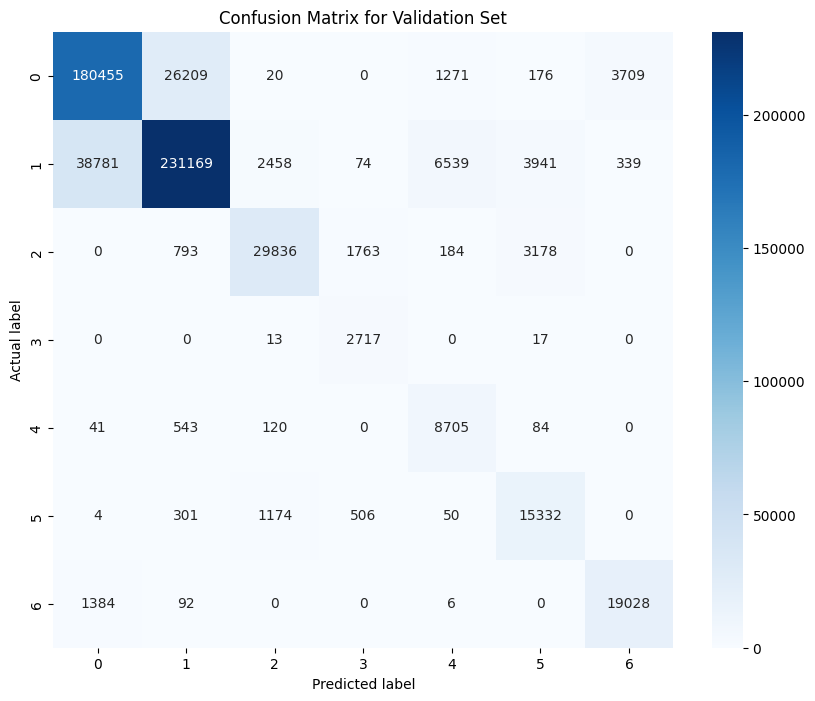

In [88]:
# Predicting on the validation set
y_val_pred = pipeline.predict(full_test_df.drop(columns=['Cover_Type']))

# Generating the confusion matrix using true labels and predictions
conf_matrix_val = confusion_matrix(full_test_df['Cover_Type'], y_val_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_val, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Validation Set")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

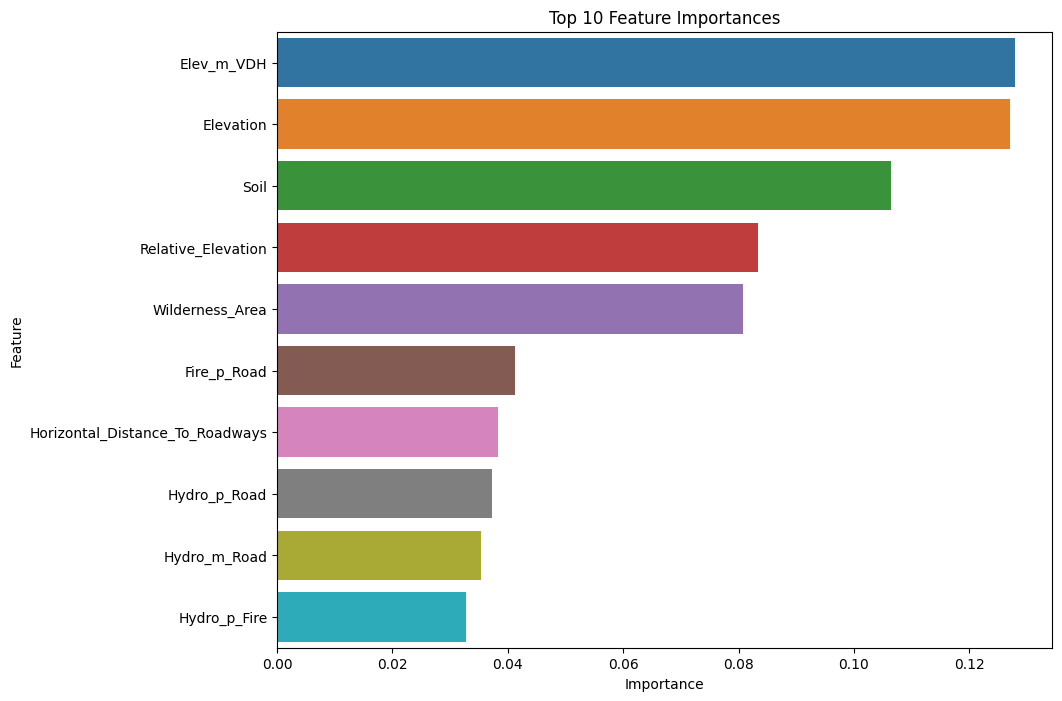

In [78]:
# Assuming 'pipeline' is your trained Pipeline containing ExtraTreesClassifier as 'classifier'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Accessing the trained classifier from the pipeline
classifier = pipeline.named_steps['classifier']

# Accessing feature importances
feature_importances = classifier.feature_importances_


# Creating a feature engineering instance and fitting it
feat_eng = FeatureEngineering()
feat_eng.fit(X_train)  # Make sure X_train is suitable for fitting

# Using the fitted instance to transform the data
X_transformed = feat_eng.transform(X_train)

# Assuming 'X_train' is the training feature set and we have the feature names
feature_names = X_transformed.columns

# Sorting the features by their importance
sorted_indices = np.argsort(feature_importances)[::-1]
top_n = 10  # Number of top features to select

# Plotting feature importances
plt.figure(figsize=(10, 8))
plt.title("Top 10 Feature Importances")
sns.barplot(x=feature_importances[sorted_indices[:top_n]], y=feature_names[sorted_indices[:top_n]])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


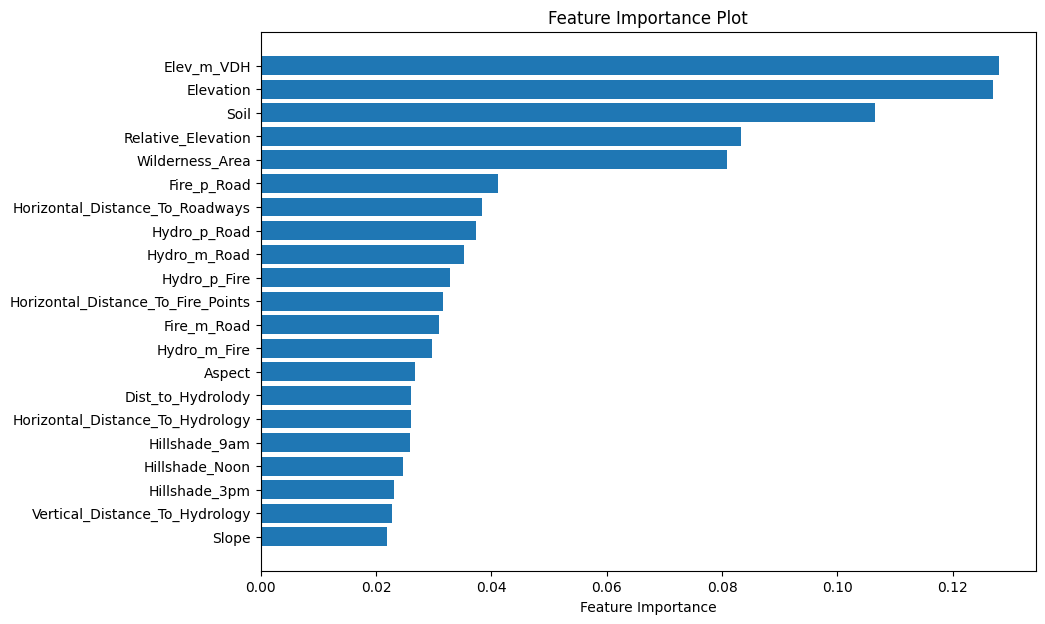

In [79]:
# Sorting the features by their importance
sorted_idx = feature_importances.argsort()

# Creating the plot
plt.figure(figsize=(10, 7))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()

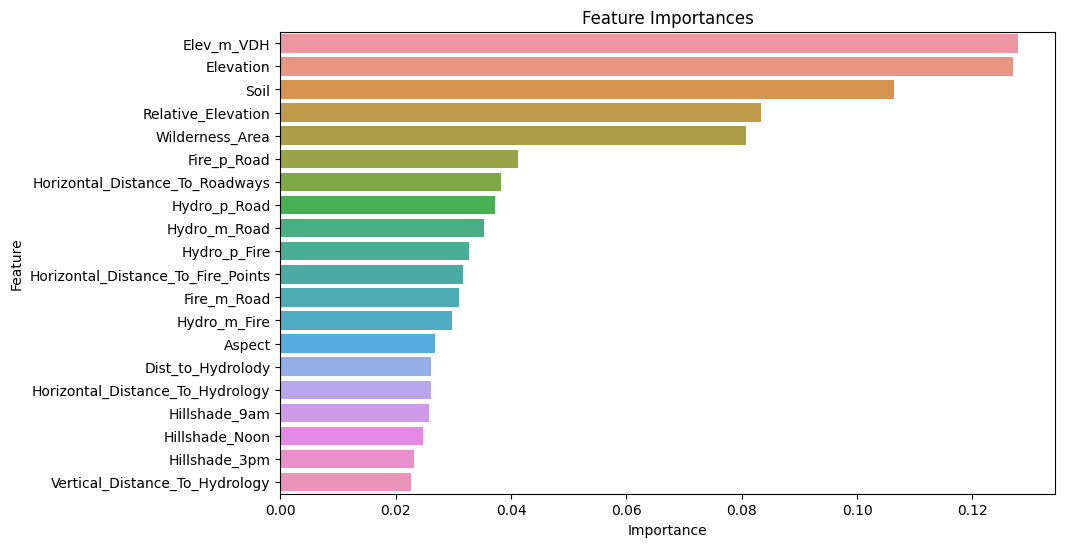

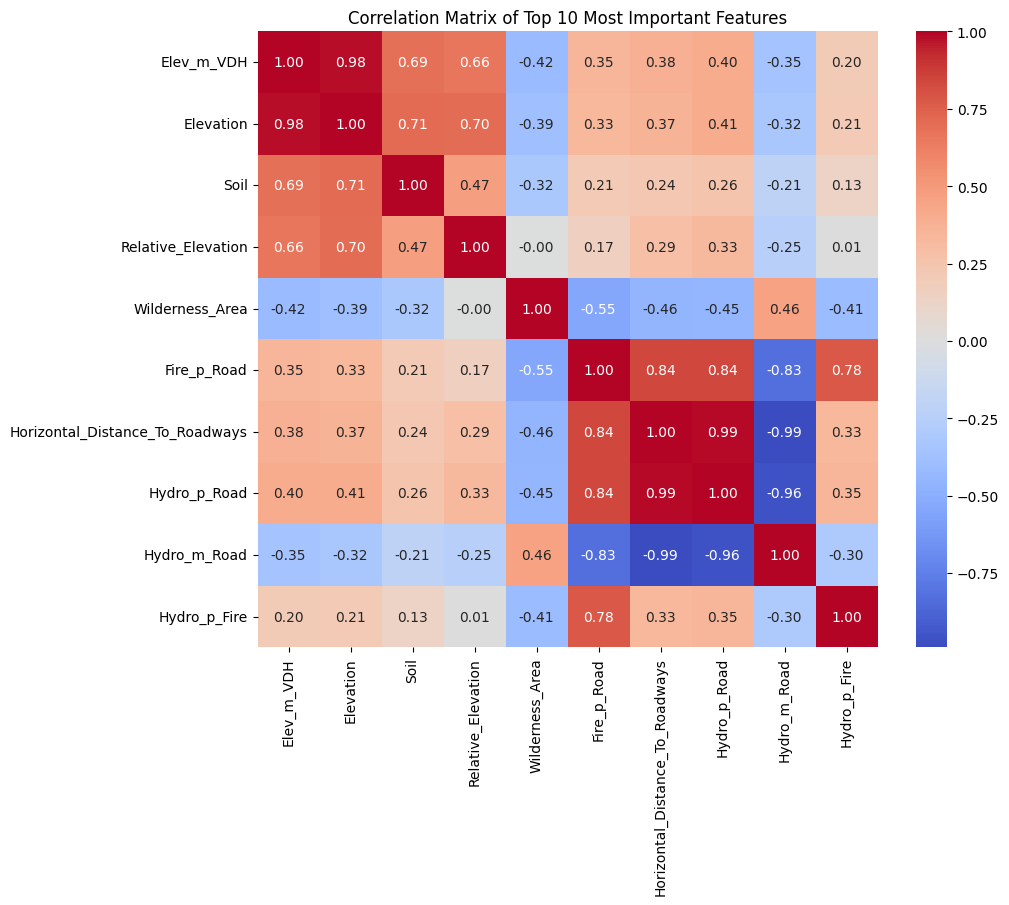

In [87]:
# Get feature importances from the trained model
feature_importances = pipeline.named_steps['classifier'].feature_importances_

new_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                        'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                        'Horizontal_Distance_To_Fire_Points', 'Elev_m_VDH', 'Dist_to_Hydrolody', 'Hydro_p_Fire',
                        'Hydro_m_Fire', 'Hydro_p_Road', 'Hydro_m_Road', 'Fire_p_Road', 'Fire_m_Road', 'Soil',
                        'Wilderness_Area', 'Relative_Elevation']

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': new_features, 'Importance': feature_importances})

# Sort the DataFrame by feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()




# Assuming 'feature_importance_df' contains the DataFrame with feature names and their importances
# Select the top 10 most important features
top_10_features = feature_importance_df.nlargest(10, 'Importance')['Feature']

feat_eng = FeatureEngineering()
feat_eng.fit(X_train)

# Transform the dataset
X_transformed = feat_eng.transform(X_train)

# Select the top 10 features for correlation analysis
top_10_features_names = top_10_features.tolist()  # Ensure this is a list of feature names

# Correctly subset the DataFrame to include only the top 10 features
X_train_top_10 = X_transformed[top_10_features_names]

# Calculate the correlation matrix for the top 10 features
correlation_matrix_top_10 = X_train_top_10.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_top_10, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Top 10 Most Important Features')
plt.show()

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import numpy as np

class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rs_df = X.copy()
        rs_df['Dist_to_Hydrolody'] = (rs_df['Horizontal_Distance_To_Hydrology']**2 + rs_df['Vertical_Distance_To_Hydrology']**2 ) **0.5
        rs_df['Elev_m_VDH'] = rs_df['Elevation'] - rs_df['Vertical_Distance_To_Hydrology']
        rs_df['Elev_p_VDH'] = rs_df['Elevation'] + rs_df['Vertical_Distance_To_Hydrology']
        rs_df['Elev_m_HDH'] = rs_df['Elevation'] - rs_df['Horizontal_Distance_To_Hydrology']
        rs_df['Elev_p_HDH'] = rs_df['Elevation'] + rs_df['Horizontal_Distance_To_Hydrology']
        rs_df['Elev_m_DH'] = rs_df['Elevation'] - rs_df['Dist_to_Hydrolody']
        rs_df['Elev_p_DH'] = rs_df['Elevation'] + rs_df['Dist_to_Hydrolody']
        rs_df['Hydro_p_Fire'] = rs_df['Horizontal_Distance_To_Hydrology'] + rs_df['Horizontal_Distance_To_Fire_Points']
        rs_df['Hydro_m_Fire'] = rs_df['Horizontal_Distance_To_Hydrology'] - rs_df['Horizontal_Distance_To_Fire_Points']
        rs_df['Hydro_p_Road'] = rs_df['Horizontal_Distance_To_Hydrology'] + rs_df['Horizontal_Distance_To_Roadways']
        rs_df['Hydro_m_Road'] = rs_df['Horizontal_Distance_To_Hydrology'] - rs_df['Horizontal_Distance_To_Roadways']
        rs_df['Fire_p_Road'] = rs_df['Horizontal_Distance_To_Fire_Points'] + rs_df['Horizontal_Distance_To_Roadways']
        rs_df['Fire_m_Road'] = rs_df['Horizontal_Distance_To_Fire_Points'] - rs_df['Horizontal_Distance_To_Roadways']
         
        rs_df['Soil'] = 0
        for i in range(1, 41):
            rs_df['Soil'] += i * rs_df['Soil_Type'+str(i)]
        
        rs_df['Wilderness_Area'] = 0
        for i in range(1, 5):
            rs_df['Wilderness_Area'] += i * rs_df['Wilderness_Area'+str(i)]

        new_features = ['Elevation', 
                        'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                        'Horizontal_Distance_To_Fire_Points', 'Elev_m_VDH', 'Dist_to_Hydrolody', 'Hydro_p_Fire',
                        'Hydro_m_Fire', 'Hydro_p_Road', 'Hydro_m_Road', 'Fire_p_Road', 'Fire_m_Road', 'Wilderness_Area', 'Soil'] 
        # 'Slope', 'Horizontal_Distance_To_Hydrology', 'Aspect', 'Vertical_Distance_To_Hydrology',
        
        return rs_df[new_features]

import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
import os
import gzip
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

# Load the full test dataset
file_path = '../data/FULL-TEST.gz'
full_test_df = pd.read_csv(gzip.open(file_path, 'rt'), names=columns_to_use, header=None)

# Define a list of features to iterate through
features_to_iterate = ['Elevation', 
                        'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                        'Horizontal_Distance_To_Fire_Points', 'Elev_m_VDH', 'Dist_to_Hydrolody', 'Hydro_p_Fire',
                        'Hydro_m_Fire', 'Hydro_p_Road', 'Hydro_m_Road', 'Fire_p_Road', 'Fire_m_Road', 'Wilderness_Area', 'Soil'] 

# # Define a function to drop one feature at a time and evaluate the model
# def evaluate_model_with_dropped_feature(features_to_drop):

# Load the training data
train_csv = os.path.join("../Data", "train.csv")
train_df = pd.read_csv(train_csv)

# Separate features and target
X = train_df.drop(columns=['Id','Cover_Type'])
y = train_df['Cover_Type']

# Combine X and y back for resampling
data = pd.concat([X, y], axis=1)
# Separate the dataset by 'Cover_Type'
cover_type_1 = data[data['Cover_Type'] == 1]
cover_type_2 = data[data['Cover_Type'] == 2]
other_cover_types = data[~data['Cover_Type'].isin([1,2])]
# Oversample 'Cover_Type' 1 and 2
cover_type_1_oversampled = resample(cover_type_1, replace=True, n_samples=25000, random_state=42)
cover_type_2_oversampled = resample(cover_type_2, replace=True, n_samples=25000, random_state=42)
# Combine the oversampled and non-oversampled parts
balanced_data = pd.concat([cover_type_1_oversampled, cover_type_2_oversampled, other_cover_types])
# Split again into features and target

X = balanced_data.drop('Cover_Type', axis=1)
y = balanced_data['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = FeatureEngineering().fit_transform(X_train)

test = FeatureEngineering().transform(full_test_df.drop(columns=['Cover_Type']))

for feature_to_drop in features_to_iterate:

    # Define the pipeline
    pipeline = Pipeline(steps=[
        # ('FeatEng', FeatureEngineering()),
        ('classifier', ExtraTreesClassifier(n_estimators=900, n_jobs=-1, verbose=0, max_depth=40, min_samples_split=10, min_samples_leaf=4, criterion='entropy'))
    ])

    # Fit the pipeline
    pipeline.fit(X_train.drop(columns=feature_to_drop), y_train)

    # Calculate validation accuracy
    val_accuracy = pipeline.score(test.drop(columns=feature_to_drop), full_test_df['Cover_Type'])
    print(f"Validation Accuracy with {feature_to_drop} dropped: {val_accuracy}")


Validation Accuracy with Elevation dropped: 0.8381857861799756


KeyboardInterrupt: 

In [31]:
# CORRECT CELL
import numpy as np
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import numpy as np

class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rs_df = X.copy()
        rs_df['Dist_to_Hydrolody'] = (rs_df['Horizontal_Distance_To_Hydrology']**2 + rs_df['Vertical_Distance_To_Hydrology']**2 ) **0.5
        rs_df['Elev_m_VDH'] = rs_df['Elevation'] - rs_df['Vertical_Distance_To_Hydrology']
        rs_df['Elev_p_VDH'] = rs_df['Elevation'] + rs_df['Vertical_Distance_To_Hydrology']
        rs_df['Elev_m_HDH'] = rs_df['Elevation'] - rs_df['Horizontal_Distance_To_Hydrology']
        rs_df['Elev_p_HDH'] = rs_df['Elevation'] + rs_df['Horizontal_Distance_To_Hydrology']
        rs_df['Elev_m_DH'] = rs_df['Elevation'] - rs_df['Dist_to_Hydrolody']
        rs_df['Elev_p_DH'] = rs_df['Elevation'] + rs_df['Dist_to_Hydrolody']
        rs_df['Hydro_p_Fire'] = rs_df['Horizontal_Distance_To_Hydrology'] + rs_df['Horizontal_Distance_To_Fire_Points']
        rs_df['Hydro_m_Fire'] = rs_df['Horizontal_Distance_To_Hydrology'] - rs_df['Horizontal_Distance_To_Fire_Points']
        rs_df['Hydro_p_Road'] = rs_df['Horizontal_Distance_To_Hydrology'] + rs_df['Horizontal_Distance_To_Roadways']
        rs_df['Hydro_m_Road'] = rs_df['Horizontal_Distance_To_Hydrology'] - rs_df['Horizontal_Distance_To_Roadways']
        rs_df['Fire_p_Road'] = rs_df['Horizontal_Distance_To_Fire_Points'] + rs_df['Horizontal_Distance_To_Roadways']
        rs_df['Fire_m_Road'] = rs_df['Horizontal_Distance_To_Fire_Points'] - rs_df['Horizontal_Distance_To_Roadways']
        rs_df['Elevation'] = rs_df['Elevation']**3
        
        rs_df['Soil'] = 0
        for i in range(1, 41):
            rs_df['Soil'] += i * rs_df['Soil_Type'+str(i)]
        
        rs_df['Wilderness_Area'] = 0
        for i in range(1, 5):
            rs_df['Wilderness_Area'] += i * rs_df['Wilderness_Area'+str(i)]

        new_features = ['Elevation', 
                        'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                        'Horizontal_Distance_To_Fire_Points', 'Elev_m_VDH', 'Dist_to_Hydrolody', 'Hydro_p_Fire',
                        'Hydro_m_Fire', 'Hydro_p_Road', 'Hydro_m_Road', 'Fire_p_Road', 'Fire_m_Road', 'Wilderness_Area', 'Soil'] 
        # 'Slope', 'Horizontal_Distance_To_Hydrology', 'Aspect', 'Vertical_Distance_To_Hydrology',
        
        return rs_df[new_features]

import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
import os
import gzip
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

# Load the full test dataset
file_path = '../data/FULL-TEST.gz'
full_test_df = pd.read_csv(gzip.open(file_path, 'rt'), names=columns_to_use, header=None)

# Define a list of features to iterate through
features_to_iterate = ['Elevation', 
                        'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                        'Horizontal_Distance_To_Fire_Points', 'Elev_m_VDH', 'Dist_to_Hydrolody', 'Hydro_p_Fire',
                        'Hydro_m_Fire', 'Hydro_p_Road', 'Hydro_m_Road', 'Fire_p_Road', 'Fire_m_Road', 'Wilderness_Area', 'Soil'] 

# # Define a function to drop one feature at a time and evaluate the model
# def evaluate_model_with_dropped_feature(features_to_drop):

# Load the training data
train_csv = os.path.join("../Data", "train.csv")
train_df = pd.read_csv(train_csv)

# Separate features and target
X = train_df.drop(columns=['Id','Cover_Type'])
y = train_df['Cover_Type']

# Combine X and y back for resampling
data = pd.concat([X, y], axis=1)
# Separate the dataset by 'Cover_Type'
cover_type_1 = data[data['Cover_Type'] == 1]
cover_type_2 = data[data['Cover_Type'] == 2]
other_cover_types = data[~data['Cover_Type'].isin([1,2])]
# Oversample 'Cover_Type' 1 and 2
cover_type_1_oversampled = resample(cover_type_1, replace=True, n_samples=25000, random_state=42)
cover_type_2_oversampled = resample(cover_type_2, replace=True, n_samples=25000, random_state=42)
# Combine the oversampled and non-oversampled parts
balanced_data = pd.concat([cover_type_1_oversampled, cover_type_2_oversampled, other_cover_types])
# Split again into features and target

X = balanced_data.drop('Cover_Type', axis=1)
y = balanced_data['Cover_Type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
X_train = FeatureEngineering().fit_transform(X_train)
test = FeatureEngineering().transform(full_test_df.drop(columns=['Cover_Type']))
# for feature_to_drop in features_to_iterate:
# Define the pipeline
pipeline = Pipeline(steps=[
        # ('FeatEng', FeatureEngineering()),
        ('standardizer', Numerical_Standardizer()),
        ('classifier', ExtraTreesClassifier(n_estimators=900, n_jobs=-1, verbose=0, max_depth=50,
                                            min_samples_split=10, min_samples_leaf=4, criterion='entropy',
                                            class_weight={1: 8, 2: 8, 3: 2, 4: 1, 5: 1, 6: 2, 7: 1}, warm_start=True))
    ]) # class_weight={1: 8, 2: 8, 3: 2, 4: 1, 5: 1, 6: 2, 7: 1})
pipeline.fit(X_train, y_train)
# Calculate validation accuracy
val_accuracy = pipeline.score(test, full_test_df['Cover_Type'])
print(f"Validation Accuracy: {val_accuracy}")


Validation Accuracy: 0.8502302878425919


In [26]:
test_csv = (os.path.join("../Data", "test-full.csv"))
test_df = pd.read_csv(test_csv)

# test = feature_engineering(test_df.drop(columns='Id'))[new_features]
predictions = pipeline.predict(test)

# Create a DataFrame with predicted cover types and corresponding IDs
result_df = pd.DataFrame({'Id': test_df['Id'], 'Cover_Type': predictions})

# Optionally, save the predictions to a CSV file
result_df.to_csv('DimensionReduction_ETClass_TunedWWeights.csv', index=False)

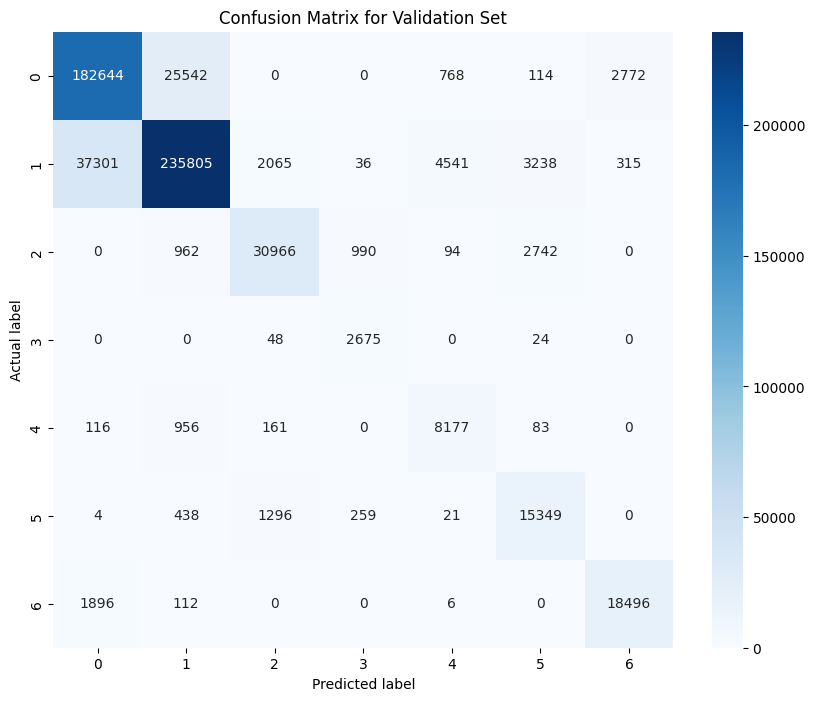

In [27]:
# Predicting on the validation set
y_val_pred = pipeline.predict(test)

# Generating the confusion matrix using true labels and predictions
conf_matrix_val = confusion_matrix(full_test_df['Cover_Type'], y_val_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_val, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Validation Set")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

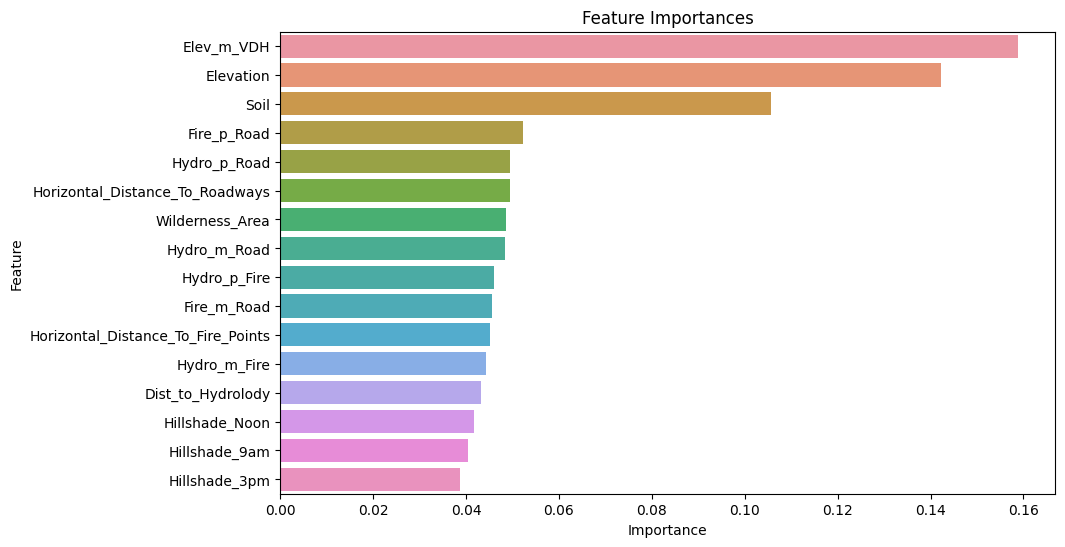

KeyError: 'Horizontal_Distance_To_Hydrology'

In [22]:
# Get feature importances from the trained model
feature_importances = pipeline.named_steps['classifier'].feature_importances_

new_features = ['Elevation', 
                'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                'Horizontal_Distance_To_Fire_Points', 'Elev_m_VDH', 'Dist_to_Hydrolody', 'Hydro_p_Fire',
                'Hydro_m_Fire', 'Hydro_p_Road', 'Hydro_m_Road', 'Fire_p_Road', 'Fire_m_Road', 'Wilderness_Area', 'Soil'] 

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': new_features, 'Importance': feature_importances})

# Sort the DataFrame by feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Assuming 'feature_importance_df' contains the DataFrame with feature names and their importances
# Select the top 10 most important features
top_10_features = feature_importance_df.nlargest(10, 'Importance')['Feature']

feat_eng = FeatureEngineering()
feat_eng.fit(X_train)

# Transform the dataset
X_transformed = feat_eng.transform(X_train)

# Select the top 10 features for correlation analysis
top_10_features_names = top_10_features.tolist()  # Ensure this is a list of feature names

# Correctly subset the DataFrame to include only the top 10 features
X_train_top_10 = X_transformed[top_10_features_names]

# Calculate the correlation matrix for the top 10 features
correlation_matrix_top_10 = X_train_top_10.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_top_10, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Top 10 Most Important Features')
plt.show()

In [6]:
class Numerical_Standardizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.numeric_columns = []
        self.binary_columns = []
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        # Identify numerical columns excluding binary columns
        self.numeric_columns = X.select_dtypes(include=['number']).columns
        self.binary_columns = [col for col in self.numeric_columns if sorted(X[col].unique()) == [0, 1]]
        self.numeric_columns = [col for col in self.numeric_columns if col not in self.binary_columns]
        
        # Fit the scaler on non-binary numerical columns
        self.scaler.fit(X[self.numeric_columns])
        return self

    def transform(self, X):
        # Standardize non-binary numerical columns
        X_transformed = X.copy()
        X_transformed[self.numeric_columns] = self.scaler.transform(X[self.numeric_columns])
        return X_transformed


In [182]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV





file_path = '../data/FULL-TEST.gz'
full_test_df = pd.read_csv(gzip.open(file_path, 'rt'), names=columns_to_use, header=None)

# Define a list of features to iterate through
features_to_iterate = ['Elevation', 
                        'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                        'Horizontal_Distance_To_Fire_Points', 'Elev_m_VDH', 'Dist_to_Hydrolody', 'Hydro_p_Fire',
                        'Hydro_m_Fire', 'Hydro_p_Road', 'Hydro_m_Road', 'Fire_p_Road', 'Fire_m_Road', 'Wilderness_Area', 'Soil'] 

# # Define a function to drop one feature at a time and evaluate the model
# def evaluate_model_with_dropped_feature(features_to_drop):

# Load the training data
train_csv = os.path.join("../Data", "train.csv")
train_df = pd.read_csv(train_csv)

# Separate features and target
X = train_df.drop(columns=['Id','Cover_Type'])
y = train_df['Cover_Type'] 

# Combine X and y back for resampling
data = pd.concat([X, y], axis=1)
# Separate the dataset by 'Cover_Type'
cover_type_1 = data[data['Cover_Type'] == 1]
cover_type_2 = data[data['Cover_Type'] == 2]
other_cover_types = data[~data['Cover_Type'].isin([1,2])]
# Oversample 'Cover_Type' 1 and 2
cover_type_1_oversampled = resample(cover_type_1, replace=True, n_samples=25000, random_state=42)
cover_type_2_oversampled = resample(cover_type_2, replace=True, n_samples=25000, random_state=42)
# Combine the oversampled and non-oversampled parts
balanced_data = pd.concat([cover_type_1_oversampled, cover_type_2_oversampled, other_cover_types])
# Split again into features and target

X = balanced_data.drop('Cover_Type', axis=1)
y = balanced_data['Cover_Type'] -1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = FeatureEngineering().fit_transform(X_train)

test = FeatureEngineering().transform(full_test_df.drop(columns=['Cover_Type']))











# Define the pipeline
pipeline_bagging = Pipeline(steps=[
    ('standardizer', StandardScaler()),  # Standardize numerical features
    ('classifier', BaggingClassifier(base_estimator=ExtraTreesClassifier(n_estimators=900, 
                                                                         n_jobs=1, 
                                                                         verbose=1, 
                                                                         max_depth=50,
                                                                         min_samples_split=10,
                                                                         min_samples_leaf=4,
                                                                         criterion='entropy',
                                                                         class_weight={0: 8, 1: 8, 2: 2, 3: 1, 4: 1, 5: 2, 6: 1})))
])

pipeline_adaboost = Pipeline(steps=[
    ('standardizer', StandardScaler()),  # Standardize numerical features
    ('classifier', AdaBoostClassifier(base_estimator=ExtraTreesClassifier(n_estimators=900, 
                                                                          n_jobs=-1, 
                                                                          verbose=0, 
                                                                          max_depth=50,
                                                                          min_samples_split=10,
                                                                          min_samples_leaf=4,
                                                                          criterion='entropy',
                                                                          class_weight={0: 8, 1: 8, 2: 2, 3: 1, 4: 1, 5: 2, 6: 1})))
])

# Define parameter grids for hyperparameter tuning
param_grid_bagging = {
    'classifier__n_estimators': [5],#, 100, 200],
    'classifier__max_samples': [0.5],#, 0.7, 1.0],
    'classifier__max_features': [0.5],#, 0.7, 1.0],
}

param_grid_adaboost = {
    'classifier__n_estimators': [20],#, 100, 200], 
    'classifier__learning_rate': [0.1],#, 0.1, 1.0],
}

# Perform grid search with cross-validation
# grid_search_bagging = GridSearchCV(pipeline_bagging, param_grid_bagging, cv=2, n_jobs=-1, verbose=1)
grid_search_adaboost = GridSearchCV(pipeline_adaboost, param_grid_adaboost, cv=2, n_jobs=-1, verbose=1)

# Fit the models
# grid_search_bagging.fit(X_train, y_train)
grid_search_adaboost.fit(X_train, y_train)

# # Get the best scores and parameters
# best_score_bagging = grid_search_bagging.best_score_
# best_params_bagging = grid_search_bagging.best_params_

best_score_adaboost = grid_search_adaboost.best_score_
best_params_adaboost = grid_search_adaboost.best_params_

# Evaluate on test data
# test_score_bagging = grid_search_bagging.score(test, full_test_df['Cover_Type']-1)
test_score_adaboost = grid_search_adaboost.score(test, full_test_df['Cover_Type']-1)

# print("Bagging Results:")
# print(f"Best Score: {best_score_bagging}")
# print(f"Best Parameters: {best_params_bagging}")
# print(f"Test Score: {test_score_bagging}")

print("\nAdaBoost Results:")
print(f"Best Score: {best_score_adaboost}")
print(f"Best Parameters: {best_params_adaboost}")
print(f"Test Score: {test_score_adaboost}")


Fitting 2 folds for each of 1 candidates, totalling 2 fits


c:\Users\nadiy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



AdaBoost Results:
Best Score: 0.9725740131578948
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 20}
Test Score: 0.8310895472038443


In [91]:
# CORRECT CELL
import numpy as np
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
import os
import gzip
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np


class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rs_df = X.copy()
        rs_df['Dist_to_Hydrolody'] = (rs_df['Horizontal_Distance_To_Hydrology']**2 + rs_df['Vertical_Distance_To_Hydrology']**2 ) **0.5
        rs_df['Elev_m_VDH'] = rs_df['Elevation'] - rs_df['Vertical_Distance_To_Hydrology']
        rs_df['Elev_p_VDH'] = rs_df['Elevation'] + rs_df['Vertical_Distance_To_Hydrology']
        rs_df['Elev_m_HDH'] = rs_df['Elevation'] - rs_df['Horizontal_Distance_To_Hydrology']
        rs_df['Elev_p_HDH'] = rs_df['Elevation'] + rs_df['Horizontal_Distance_To_Hydrology']
        rs_df['Elev_m_DH'] = rs_df['Elevation'] - rs_df['Dist_to_Hydrolody']
        rs_df['Elev_p_DH'] = rs_df['Elevation'] + rs_df['Dist_to_Hydrolody']
        rs_df['Hydro_p_Fire'] = rs_df['Horizontal_Distance_To_Hydrology'] + rs_df['Horizontal_Distance_To_Fire_Points']
        rs_df['Hydro_m_Fire'] = rs_df['Horizontal_Distance_To_Hydrology'] - rs_df['Horizontal_Distance_To_Fire_Points']
        rs_df['Hydro_p_Road'] = rs_df['Horizontal_Distance_To_Hydrology'] + rs_df['Horizontal_Distance_To_Roadways']
        rs_df['Hydro_m_Road'] = rs_df['Horizontal_Distance_To_Hydrology'] - rs_df['Horizontal_Distance_To_Roadways']
        rs_df['Fire_p_Road'] = rs_df['Horizontal_Distance_To_Fire_Points'] + rs_df['Horizontal_Distance_To_Roadways']
        rs_df['Fire_m_Road'] = rs_df['Horizontal_Distance_To_Fire_Points'] - rs_df['Horizontal_Distance_To_Roadways']
        rs_df['Elevation'] = rs_df['Elevation']**3
        
        rs_df['Soil'] = 0
        for i in range(1, 41):
            rs_df['Soil'] += i * rs_df['Soil_Type'+str(i)]
        
        rs_df['Wilderness_Area'] = 0
        for i in range(1, 5):
            rs_df['Wilderness_Area'] += i * rs_df['Wilderness_Area'+str(i)]

        new_features = ['Elevation', 
                        'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                        'Horizontal_Distance_To_Fire_Points', 'Elev_m_VDH', 'Dist_to_Hydrolody', 'Hydro_p_Fire',
                        'Hydro_m_Fire', 'Hydro_p_Road', 'Hydro_m_Road', 'Fire_p_Road', 'Fire_m_Road', 'Wilderness_Area', 'Soil'] 
        # 'Slope', 'Horizontal_Distance_To_Hydrology', 'Aspect', 'Vertical_Distance_To_Hydrology',
        
        return rs_df[new_features]  

class Numerical_Standardizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.numeric_columns = []
        self.binary_columns = []
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        # Identify numerical columns excluding binary columns
        self.numeric_columns = X.select_dtypes(include=['number']).columns
        self.binary_columns = [col for col in self.numeric_columns if sorted(X[col].unique()) == [0, 1]]
        self.numeric_columns = [col for col in self.numeric_columns if col not in self.binary_columns]
        
        # Fit the scaler on non-binary numerical columns
        self.scaler.fit(X[self.numeric_columns])
        return self

    def transform(self, X):
        # Standardize non-binary numerical columns
        X_transformed = X.copy()
        X_transformed[self.numeric_columns] = self.scaler.transform(X[self.numeric_columns])
        return X_transformed


# Load the full test dataset
file_path = '../data/FULL-TEST.gz'
columns_to_use = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
    'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
    'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
    'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
    'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
    'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
    'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
    'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
    'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
    'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
    'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
    'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
    'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
    'Cover_Type'
]

def OverSample12(train_df, i):
    """
    Function to oversample cover_types 1 and 2 in the dataset, if they are not empty.
    
    Inputs:
    train_df: DataFrame to edit

    Outputs:
    X: Resampled Design Matrix
    y: Resampled target Variable    
    """
    n_samples = 25000

    if i == 3:
        n_samples = 50000
    
    # Separate features and target
    X = train_df.drop(columns=['Id', 'Cover_Type'])
    y = train_df['Cover_Type']

    # Combine X and y back for resampling
    data = pd.concat([X, y], axis=1)

    # Separate the dataset by 'Cover_Type'
    cover_type_1 = data[data['Cover_Type'] == 1]
    cover_type_2 = data[data['Cover_Type'] == 2]
    other_cover_types = data[~data['Cover_Type'].isin([1, 2])]

    # Initialize an empty list to collect DataFrames for concatenation
    dataframes_to_combine = [other_cover_types]

    # Check if cover_type_1 is not empty, then oversample
    if not cover_type_1.empty:
        cover_type_1_oversampled = resample(cover_type_1, replace=True, n_samples=n_samples, random_state=42)
        dataframes_to_combine.append(cover_type_1_oversampled)
    
    # Check if cover_type_2 is not empty, then oversample
    if not cover_type_2.empty:
        cover_type_2_oversampled = resample(cover_type_2, replace=True, n_samples=n_samples, random_state=42)
        dataframes_to_combine.append(cover_type_2_oversampled)

    # Combine the oversampled and non-oversampled parts
    balanced_data = pd.concat(dataframes_to_combine)

    # Split again into features and target
    X = balanced_data.drop('Cover_Type', axis=1)
    y = balanced_data['Cover_Type']

    return X, y

pipelines = {}
predictions = {}

for i in range(1,5):
    full_test_df = pd.read_csv(gzip.open(file_path, 'rt'), names=columns_to_use, header=None)
    full_test_df['ind'] = full_test_df.index
    mask = full_test_df['Wilderness_Area' + str(i)] == True
    full_test_df = full_test_df[mask]
    original_indices = full_test_df['ind'].tolist()
    full_test_df.drop(columns='ind', inplace=True)


    # Load the training data
    train_csv = os.path.join("../Data", "train.csv")
    train_df = pd.read_csv(train_csv)

    mask = train_df['Wilderness_Area' + str(i)] == True
    train_df = train_df[mask]

    X,y = OverSample12(train_df, i)

    test_size = 0.2
    if i == 3:
        test_size = 0.4
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=7)


    pipeline = Pipeline(steps=[
            ('FeatEng', FeatureEngineering()),
            ('standardizer', Numerical_Standardizer()),
            ('classifier', ExtraTreesClassifier(n_estimators=900, n_jobs=-1, verbose=0, max_depth=50,
                                                min_samples_split=10, min_samples_leaf=4, criterion='entropy',
                                                class_weight={1: 8, 2: 8, 3: 2, 4: 1, 5: 1, 6: 2, 7: 1}, warm_start=True))
        ]) 
    pipeline.fit(X_train, y_train)
    pipelines[f'area{i}'] = pipeline

    # Calculate validation accuracy
    val_accuracy = pipeline.score(full_test_df, full_test_df['Cover_Type'])
    predictions[i] = {'predictions': pipeline.predict(full_test_df.drop('Cover_Type', axis=1)), 'indices': original_indices}
    print(f"{i}Validation Accuracy: {val_accuracy}")

    # Calculate validation accuracy
    # val_accuracy = pipeline.score(full_test_df, full_test_df['Cover_Type'])
    # print(f"Validation Accuracy: {val_accuracy}")


1Validation Accuracy: 0.8640546634150831
2Validation Accuracy: 0.8597242671663766
3Validation Accuracy: 0.8404508927866626
4Validation Accuracy: 0.8580123349924259


In [92]:
import pandas as pd

# List to store temporary DataFrames
temp_dfs = []

# Iterate through each key in the predictions dictionary
for area, data in predictions.items():
    # Extract ids (indices) and predictions for the current area
    ids = data['indices']
    cover_types = data['predictions']
    
    # Create a temporary DataFrame and append it to the list
    temp_df = pd.DataFrame({
        'Id': ids,
        'Cover_Type': cover_types
    })
    temp_dfs.append(temp_df)

# Concatenate all DataFrames in the list into a single DataFrame
consolidated_predictions_df = pd.concat(temp_dfs).sort_values('Id').reset_index(drop=True)

consolidated_predictions_df['Id'] += 1

# # Export to CSV
consolidated_predictions_df.to_csv('final_submission.csv', index=False)


In [93]:
from sklearn.metrics import accuracy_score

# Assuming consolidated_predictions_df is your DataFrame with predictions
# and it's aligned with full_test_df's indices
full_test_df = pd.read_csv(gzip.open(file_path, 'rt'), names=columns_to_use, header=None)

# Ensure the 'Id' column in your predictions DataFrame matches the index in full_test_df
consolidated_predictions_df.set_index('Id', inplace=True)

# Extract the actual 'Cover_Type' values from full_test_df using the indices in consolidated_predictions_df
actual_values = full_test_df['Cover_Type']

# Calculate accuracy
accuracy = accuracy_score(actual_values, consolidated_predictions_df['Cover_Type'])

print(f"Accuracy: {accuracy}")


Accuracy: 0.8531544959484486
